In [1]:
import pandas as pd
from tqdm.notebook import tqdm

In [3]:
# Correct the file path and load the Worldbank data
worldbank_data = pd.read_csv('D:\worldbank.csv', skiprows=3)

# Display the first few rows of the dataframe
print(worldbank_data.head())

  Country Name Country Code                            Indicator Name   
0        Aruba          ABW  Urban population (% of total population)  \
1        Aruba          ABW                          Urban population   
2        Aruba          ABW        Urban population growth (annual %)   
3        Aruba          ABW                         Population, total   
4        Aruba          ABW              Population growth (annual %)   

      Indicator Code       1960          1961          1962          1963   
0  SP.URB.TOTL.IN.ZS     50.776     50.761000     50.746000     50.730000  \
1        SP.URB.TOTL  27728.000  28330.000000  28764.000000  29157.000000   
2        SP.URB.GROW        NaN      2.147858      1.520329      1.357042   
3        SP.POP.TOTL  54608.000  55811.000000  56682.000000  57475.000000   
4        SP.POP.GROW        NaN      2.179059      1.548572      1.389337   

           1964          1965  ...           2014           2015   
0     50.715000     50.700000 

In [4]:
def reshape_worldbank_data(filename):
    # Read the data
    data = pd.read_csv(filename, skiprows=4)
    
    # Drop the 'Unnamed: 67' column which is empty
    data.drop(columns=['Unnamed: 67'], inplace=True)
    
    # Create a dataframe with years as columns
    years_as_columns = data.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
    
    # Create a dataframe with countries as columns
    countries_as_columns = data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                                     var_name='Year', value_name='Value')
    
    return years_as_columns, countries_as_columns

# Call the function and assign the output to two variables
years_df, countries_df = reshape_worldbank_data('D:\worldbank.csv')

# Display the first few rows of both dataframes
print('Years as columns dataframe head:')
print(years_df.head())
print('\nCountries as columns dataframe head:')
print(countries_df.head())

Years as columns dataframe head:
        1960          1961          1962          1963          1964   
0     50.776     50.761000     50.746000     50.730000     50.715000  \
1  27728.000  28330.000000  28764.000000  29157.000000  29505.000000   
2        NaN      2.147858      1.520329      1.357042      1.186472   
3  54608.000  55811.000000  56682.000000  57475.000000  58178.000000   
4        NaN      2.179059      1.548572      1.389337      1.215721   

           1965          1966          1967          1968          1969  ...   
0     50.700000     50.685000     50.670000     50.654000     50.639000  ...  \
1  29802.000000  30052.000000  30160.000000  30124.000000  30044.000000  ...   
2      1.001576      0.835371      0.358733     -0.119435     -0.265922  ...   
3  58782.000000  59291.000000  59522.000000  59471.000000  59330.000000  ...   
4      1.032841      0.862184      0.388847     -0.085719     -0.237372  ...   

            2013           2014           2015       

In [5]:
print('Years as columns dataframe head:')
print(years_df.head())

Years as columns dataframe head:
        1960          1961          1962          1963          1964   
0     50.776     50.761000     50.746000     50.730000     50.715000  \
1  27728.000  28330.000000  28764.000000  29157.000000  29505.000000   
2        NaN      2.147858      1.520329      1.357042      1.186472   
3  54608.000  55811.000000  56682.000000  57475.000000  58178.000000   
4        NaN      2.179059      1.548572      1.389337      1.215721   

           1965          1966          1967          1968          1969  ...   
0     50.700000     50.685000     50.670000     50.654000     50.639000  ...  \
1  29802.000000  30052.000000  30160.000000  30124.000000  30044.000000  ...   
2      1.001576      0.835371      0.358733     -0.119435     -0.265922  ...   
3  58782.000000  59291.000000  59522.000000  59471.000000  59330.000000  ...   
4      1.032841      0.862184      0.388847     -0.085719     -0.237372  ...   

            2013           2014           2015       

In [6]:
# Explore the statistical properties of a few indicators for select countries
selected_countries = ['United States', 'China', 'India', 'United Kingdom', 'Brazil']
selected_indicators = ['Urban population (% of total population)', 'Rural population (% of total population)', 'GDP (current US$)']

# Filter the data for the selected countries and indicators
selected_data = countries_df[(countries_df['Country Name'].isin(selected_countries)) & (countries_df['Indicator Name'].isin(selected_indicators))]

# Display summary statistics for the selected data
summary_stats = selected_data.groupby(['Country Name', 'Indicator Name'])['Value'].describe()
summary_stats

,,count,mean,std,min,25%,50%,75%,max
Country Name,Indicator Name,,,,,,,,
Brazil,Urban population (% of total population),63.0,71.730714,12.877152,46.139,61.2670,74.690,83.2955,87.555
China,Urban population (% of total population),63.0,32.313190,15.277422,16.203,17.9075,27.312,44.5335,63.560
India,Urban population (% of total population),63.0,25.865857,5.141735,17.924,21.5045,25.778,29.7375,35.872
United Kingdom,Urban population (% of total population),63.0,79.325175,2.032156,77.030,78.1260,78.440,80.3390,84.398
United States,Urban population (% of total population),63.0,76.680460,3.769963,69.996,73.6580,75.701,80.1840,83.084


In [29]:
# Calculate additional statistical measures: variance and skewness
import scipy.stats as stats

# Calculate variance
variance = selected_data.groupby(['Country Name', 'Indicator Name'])['Value'].var().reset_index(name='Variance')

# Calculate skewness
skewness = selected_data.groupby(['Country Name', 'Indicator Name'])['Value'].apply(lambda x: stats.skew(x)).reset_index(name='Skewness')

# Combine variance and skewness into a single dataframe
additional_stats = variance.merge(skewness, on=['Country Name', 'Indicator Name'])

# Display the additional statistical measures
additional_stats

,Country Name,Indicator Name,Variance,Skewness
0,Brazil,Urban population (% of total population),165.821044,-0.489247
1,China,Urban population (% of total population),233.399636,0.650083
2,India,Urban population (% of total population),26.437442,0.171757
3,United Kingdom,Urban population (% of total population),4.129656,1.170621
4,United States,Urban population (% of total population),14.212621,0.141456


In [7]:
from tqdm.notebook import tqdm
import pandas as pd

tqdm.pandas()

# Select a few more indicators for correlation analysis
additional_indicators = ['Population growth (annual %)', 'CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)']

# Combine selected indicators with additional indicators for analysis
all_indicators = selected_indicators + additional_indicators

# Filter the data for the combined indicators
all_indicators_data = countries_df[countries_df['Indicator Name'].isin(all_indicators)]

# Pivot the data to have indicators as columns and each row as a country-year pair
pivot_data = all_indicators_data.pivot_table(index=['Country Name', 'Year'], columns='Indicator Name', values='Value').reset_index()

# Calculate the correlation matrix for the indicators across all countries and years
correlation_matrix = pivot_data.groupby('Country Name').progress_apply(lambda x: x.drop(columns=['Country Name', 'Year']).corr()).reset_index()

# Display the correlation matrix
print(correlation_matrix.head())

  0%|          | 0/265 [00:00<?, ?it/s]

Indicator Name                 Country Name   
0                               Afghanistan  \
1                               Afghanistan   
2                               Afghanistan   
3               Africa Eastern and Southern   
4               Africa Eastern and Southern   

Indicator Name                            Indicator Name   
0                 CO2 emissions (metric tons per capita)  \
1                           Population growth (annual %)   
2               Urban population (% of total population)   
3                 CO2 emissions (metric tons per capita)   
4                           Population growth (annual %)   

Indicator Name  CO2 emissions (metric tons per capita)   
0                                             1.000000  \
1                                            -0.250948   
2                                             0.755404   
3                                             1.000000   
4                                             0.371018   

Indicat

In [14]:
pip install ipywidgets


[notice] A new release of pip is available: 23.2 -> 23.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/4a/0e/57ed498fafbc60419a9332d872e929879ceba2d73cb11d284d7112472b3e/ipywidgets-8.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~=4.0.9 from https://files.pythonhosted.org/packages/29/03/107d96077c4befed191f7ad1a12c7b52a8f9d2778a5836d59f9855c105f6/widgetsnbextension-4.0.9-py3-none-any.whl.metadata
  Obtaining dependency information for jupyterlab-widgets~=3.0.9 from https://files.pythonhosted.org/packages/e8/05/0ebab152288693b5ec7b339aab857362947031143b282853b4c2dd4b5b40/jupyterlab_widgets-3.0.9-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/139.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/139.4 kB ? eta -:--:--
   -------- ------------------------------ 30.7/139.

In [32]:
# Calculate correlations between indicators
indicator_correlations = selected_data.pivot_table(index='Country Name', columns='Indicator Name', values='Value')
indicator_correlations.corr()

Indicator Name,Urban population (% of total population)
Indicator Name,
Urban population (% of total population),1.0


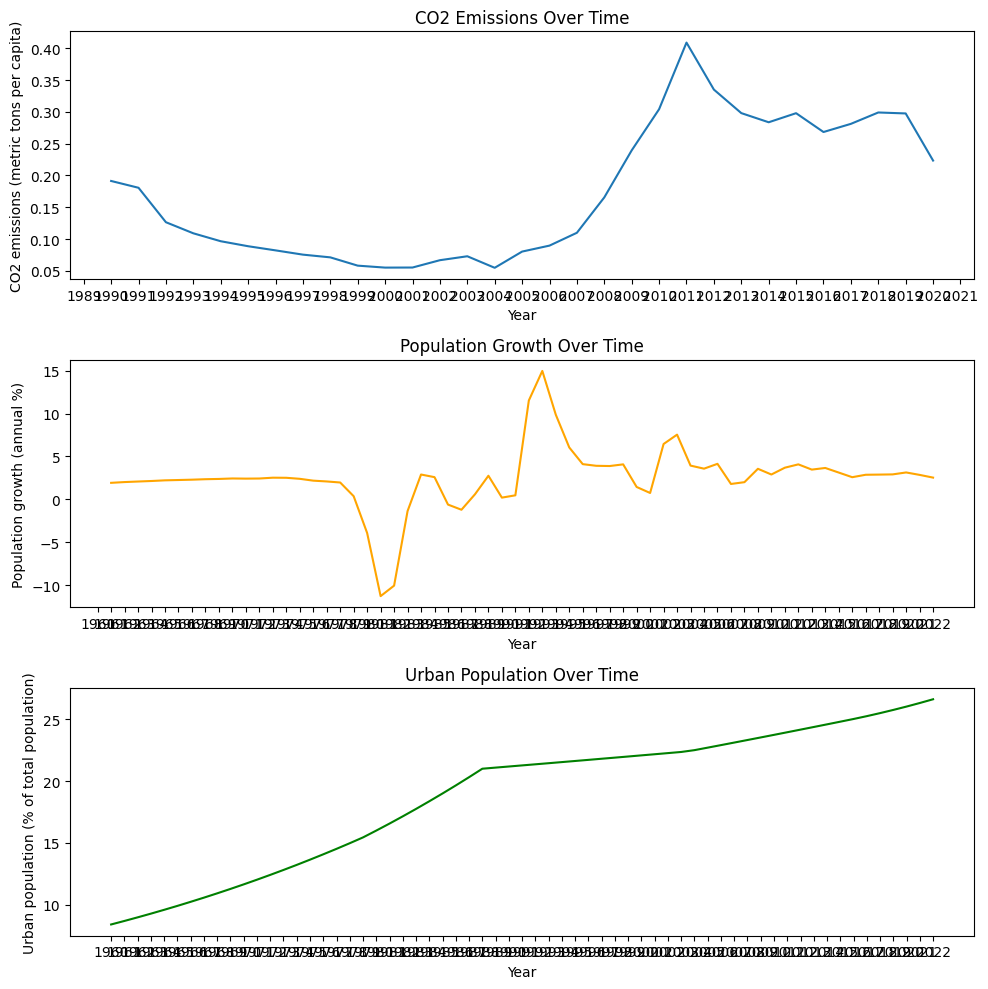

In [8]:
import matplotlib.pyplot as plt

# Select a country for time series visualization
selected_country = 'Afghanistan'

country_data = pivot_data[pivot_data['Country Name'] == selected_country]

# Plot the time series for the selected indicators
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

axes[0].plot(country_data['Year'], country_data['CO2 emissions (metric tons per capita)'], label='CO2 emissions (metric tons per capita)')
axes[0].set_title('CO2 Emissions Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('CO2 emissions (metric tons per capita)')

axes[1].plot(country_data['Year'], country_data['Population growth (annual %)'], label='Population growth (annual %)', color='orange')
axes[1].set_title('Population Growth Over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Population growth (annual %)')

axes[2].plot(country_data['Year'], country_data['Urban population (% of total population)'], label='Urban population (% of total population)', color='green')
axes[2].set_title('Urban Population Over Time')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Urban population (% of total population)')

plt.tight_layout()
plt.show()

In [18]:
# Assuming 'Year' is a column with integer values
country_data.loc[:, 'Year'] = pd.to_datetime(country_data['Year'], format='%Y')

# Filter data for the last 10 years
last_10_years_data = country_data[country_data['Year'] > (country_data['Year'].max() - pd.DateOffset(years=10))]

axes[1].plot(last_10_years_data['Year'], last_10_years_data['Population growth (annual %)'], label='Population growth (annual %)', color='orange')
axes[1].set_title('Population Growth Over the Last 10 Years')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Population growth (annual %)')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_6176\3368382576.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Year'] = pd.to_numeric(country_data['Year'], errors='coerce')


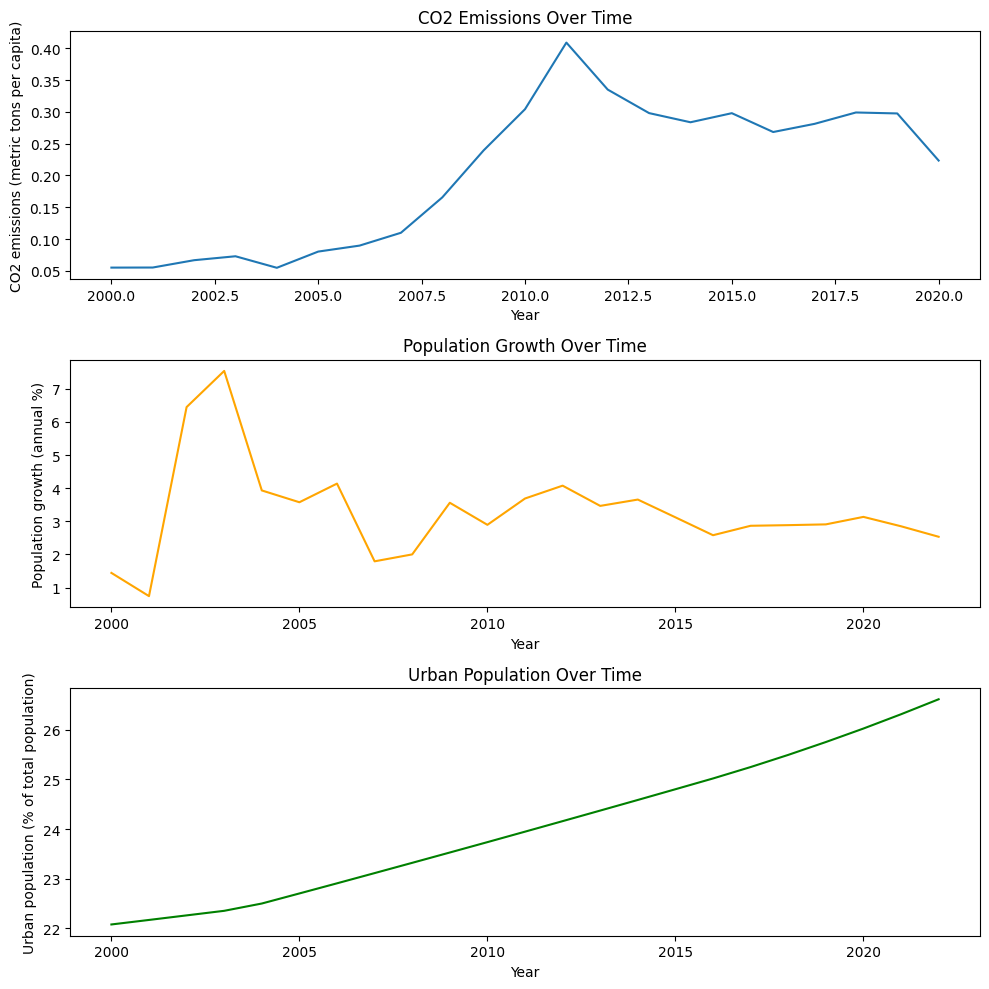

In [36]:
import matplotlib.pyplot as plt

# Select a country for time series visualization
selected_country = 'Afghanistan'

country_data = pivot_data[pivot_data['Country Name'] == selected_country]

# Convert 'Year' column to numeric
country_data['Year'] = pd.to_numeric(country_data['Year'], errors='coerce')

# Filter data for the year 2000 and onwards
country_data = country_data[country_data['Year'] >= 2000]

# Plot the time series for the selected indicators
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

axes[0].plot(country_data['Year'], country_data['CO2 emissions (metric tons per capita)'], label='CO2 emissions (metric tons per capita)')
axes[0].set_title('CO2 Emissions Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('CO2 emissions (metric tons per capita)')

axes[1].plot(country_data['Year'], country_data['Population growth (annual %)'], label='Population growth (annual %)', color='orange')
axes[1].set_title('Population Growth Over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Population growth (annual %)')

axes[2].plot(country_data['Year'], country_data['Urban population (% of total population)'], label='Urban population (% of total population)', color='green')
axes[2].set_title('Urban Population Over Time')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Urban population (% of total population)')

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_13464\3002029292.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_data['Year'] = pd.to_numeric(countries_data['Year'], errors='coerce')


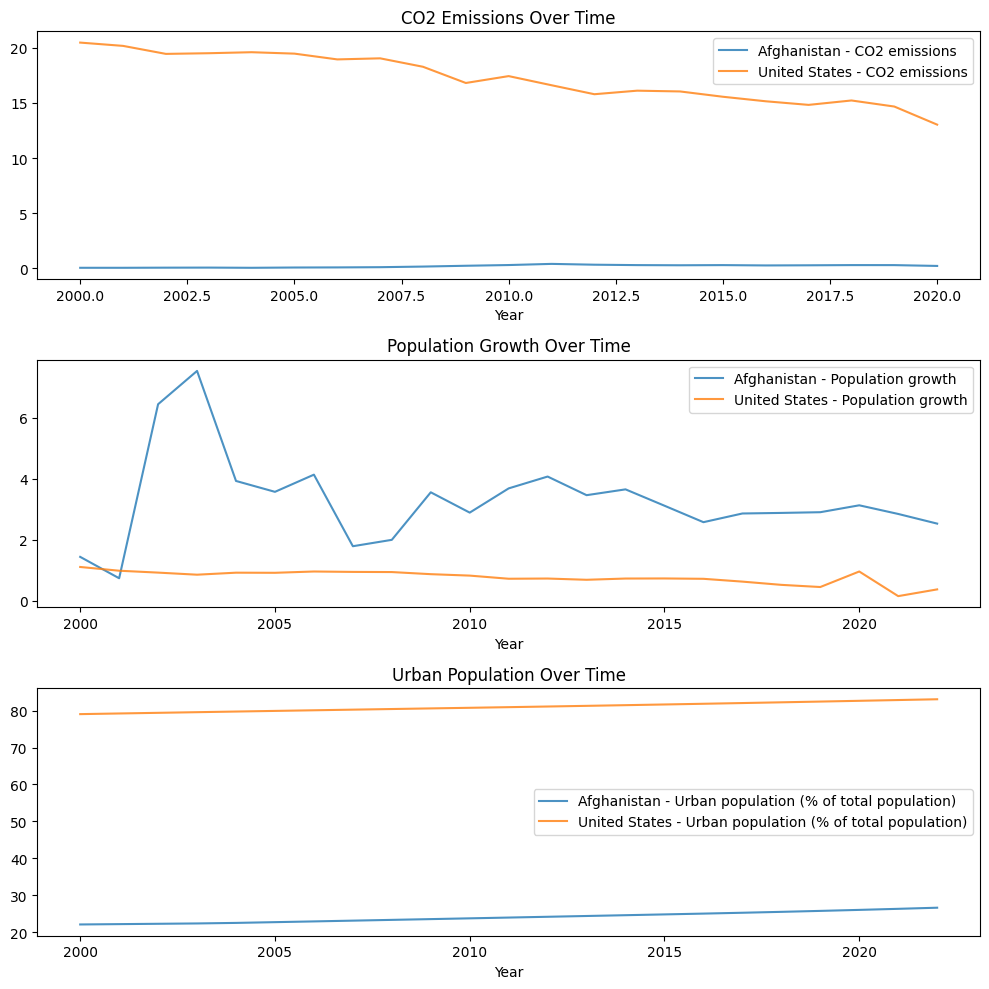

In [11]:
import matplotlib.pyplot as plt

# Select countries for time series visualization
selected_countries = ['Afghanistan', 'United States']

# Filter data for the selected countries
countries_data = pivot_data[pivot_data['Country Name'].isin(selected_countries)]

# Convert 'Year' column to numeric
countries_data['Year'] = pd.to_numeric(countries_data['Year'], errors='coerce')

# Filter data for the year 2000 and onwards
countries_data = countries_data[countries_data['Year'] >= 2000]

# Plot the time series for the selected indicators
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

for country in selected_countries:
    country_data = countries_data[countries_data['Country Name'] == country]

    axes[0].plot(country_data['Year'], country_data['CO2 emissions (metric tons per capita)'], label=f'{country} - CO2 emissions', alpha=0.8)
    axes[1].plot(country_data['Year'], country_data['Population growth (annual %)'], label=f'{country} - Population growth', alpha=0.8)
    axes[2].plot(country_data['Year'], country_data['Urban population (% of total population)'], label=f'{country} - Urban population (% of total population)', alpha=0.8)

# Set plot titles, labels, and legend
axes[0].set_title('CO2 Emissions Over Time')
axes[1].set_title('Population Growth Over Time')
axes[2].set_title('Urban Population Over Time')

for ax in axes:
    ax.set_xlabel('Year')
    ax.legend()

plt.tight_layout()
plt.show()

In [12]:
# Re-attempt to calculate the correlation matrix without using progress_apply
# Since tqdm is already installed, we'll try a different approach

# Calculate the correlation matrix for the indicators across all countries and years
# We'll use a standard groupby and apply without the progress bar

# First, let's ensure the pivot_data is correctly structured
pivot_data = all_indicators_data.pivot_table(index=['Country Name', 'Year'], columns='Indicator Name', values='Value').reset_index()

# Now, calculate the correlation matrix
# We'll use a simple groupby and apply to avoid the tqdm issue

# Define a function to calculate correlation matrix for a group
def calculate_correlation(group):
    return group.drop(columns=['Country Name', 'Year']).corr()

# Apply the function to each group
correlation_matrix = pivot_data.groupby('Country Name').apply(calculate_correlation).reset_index()

# Display the head of the correlation matrix
print(correlation_matrix.head())

Indicator Name                 Country Name   
0                               Afghanistan  \
1                               Afghanistan   
2                               Afghanistan   
3               Africa Eastern and Southern   
4               Africa Eastern and Southern   

Indicator Name                            Indicator Name   
0                 CO2 emissions (metric tons per capita)  \
1                           Population growth (annual %)   
2               Urban population (% of total population)   
3                 CO2 emissions (metric tons per capita)   
4                           Population growth (annual %)   

Indicator Name  CO2 emissions (metric tons per capita)   
0                                             1.000000  \
1                                            -0.250948   
2                                             0.755404   
3                                             1.000000   
4                                             0.371018   

Indicat

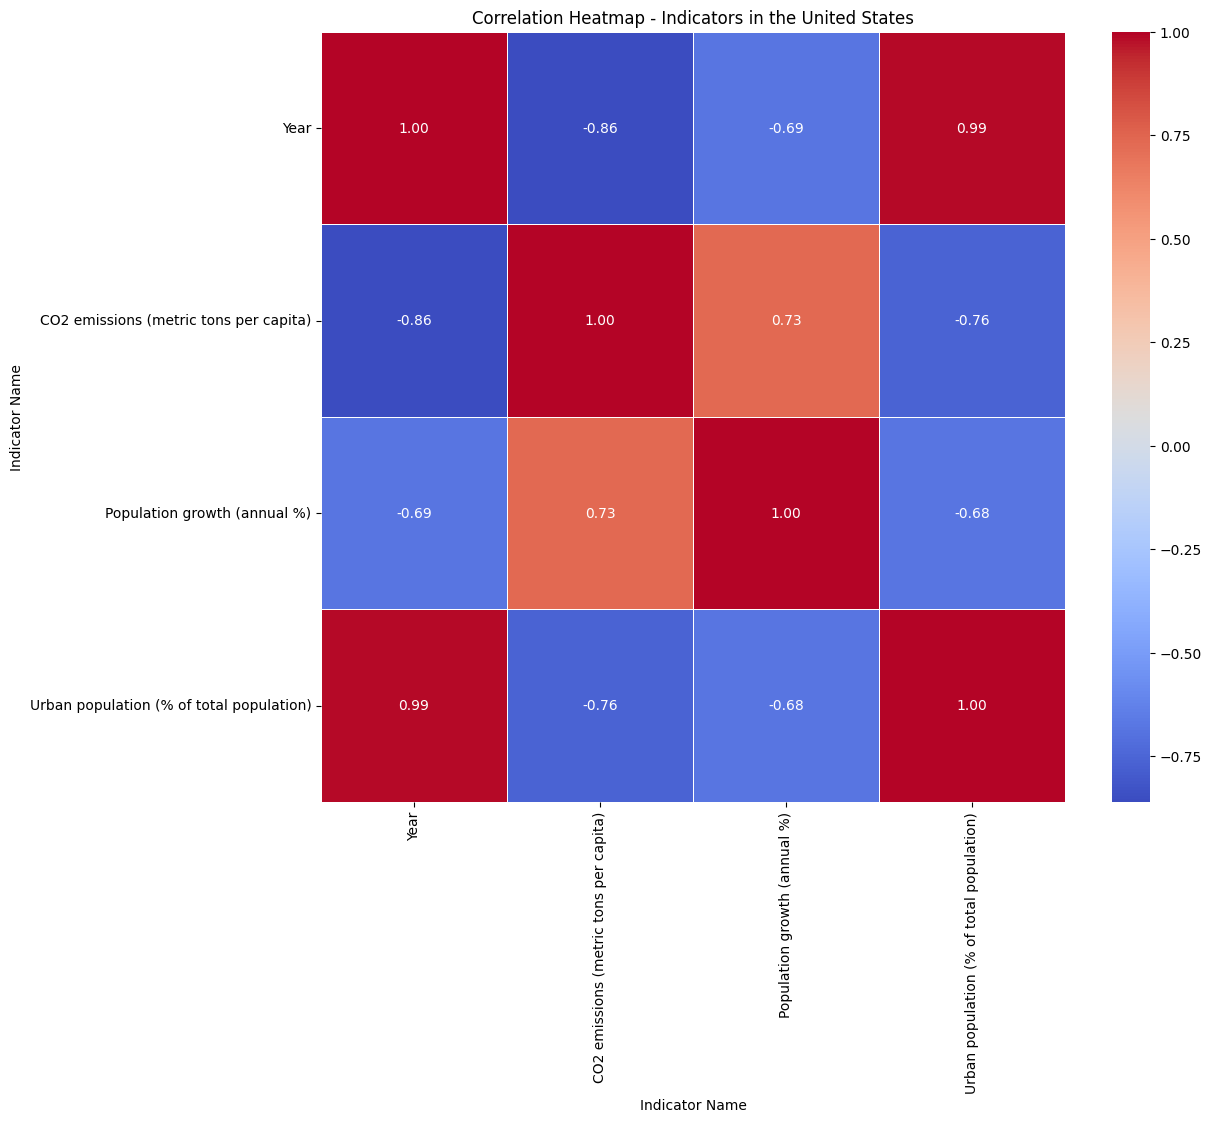

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only data for the United States
us_data = all_indicators_data[all_indicators_data['Country Name'] == 'United States']

# Pivot the data to the desired structure
pivot_data_us = us_data.pivot_table(index='Year', columns='Indicator Name', values='Value').reset_index()

# Calculate the correlation matrix for the indicators in the United States
correlation_matrix_us = pivot_data_us.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_us, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap - Indicators in the United States')
plt.show()
